In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
import time
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import linalg

In [2]:
bostonData = load_boston()

In [3]:
print("Boston keys: " + str(bostonData.keys()) + "\n")
print("Boston data shape: " + str(bostonData.data.shape) + "\n")
print("Boston feature names: " + str(bostonData.feature_names) + "\n")

Boston keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Boston data shape: (506, 13)

Boston feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']



In [4]:
#print(bostonData.DESCR)

In [5]:
bostonAsDataFrame = pd.DataFrame(bostonData.data)
print(bostonAsDataFrame.head())
print("----------------------------------------------------------------------------------")

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
----------------------------------------------------------------------------------


In [6]:
bostonAsDataFrame.columns = bostonData.feature_names
print(bostonAsDataFrame.head())
print("----------------------------------------------------------------------------------")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
----------------------------------------------------------------------------------


In [7]:
#bostonAsDataFrame['PRICE'] = bostonData.target
#print(bostonAsDataFrame.head())
#print("----------------------------------------------------------------------------------")

In [8]:
boston1 = bostonAsDataFrame.as_matrix()
Q, R = np.linalg.qr(boston1)

In [9]:
boston2 = bostonData.target

In [10]:
def QRFactorizationUsingGramSchmidtMethodOfOrthogonalization(matrix):
    m, n = matrix.shape
    Q = np.zeros([m, n], dtype=np.float64)
    R = np.zeros([n, n], dtype=np.float64)
    for j in range(n):
        v = matrix[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], matrix[:, j])
            v = v - (R[i, j] * Q[:, i])
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

In [11]:
def QRFactorizationUsingHausholderMethodOfTriangularization(matrix):
    m, n = matrix.shape
    R = np.copy(matrix)
    Q = np.eye(m)
    for k in range(n):
        v = np.copy(R[k:, k])
        v = np.reshape(v, (m-k, 1))
        v[0] += np.sign(v[0]) * np.linalg.norm(v)
        v /= np.linalg.norm(v)
        R[k:, k:] = R[k:, k:] - 2 * v @ v.T @ R[k:, k:]
        Q[k:] = Q[k:]-2 * v @ v.T @ Q[k:]
    R = R[0:n, 0:]
    Q = Q[0:n, 0:]
    return R, Q.T

In [12]:
print("Time of execution \n")
# cgsm short for classicalGramSchmidtMethod
# Calculating time for classical Gram-Schmidt method
timeOfStart = time.time()
Qcgsm, Rcgsm = QRFactorizationUsingGramSchmidtMethodOfOrthogonalization(boston1)
timeOfEnd = time.time()
timeNeededForCgsm = timeOfEnd - timeOfStart
print("Time needed to execute QR factorization using Gram-Schmidt method of orthogonalization: %.10f" % timeNeededForCgsm)

Time of execution 

Time needed to execute QR factorization using Gram-Schmidt method of orthogonalization: 0.0030057430


In [13]:
# Calculating time of execution of Householder method
timeOfStart = time.time()
Rh, Qh = QRFactorizationUsingHausholderMethodOfTriangularization(boston1)
timeOfEnd = time.time()
timeNeededForHm = timeOfEnd - timeOfStart
print("Time needed to execute QR factorization using Hausholder method of triangularization: %.10f" % timeNeededForHm)

Time needed to execute QR factorization using Hausholder method of triangularization: 0.1041257381


In [14]:
differenceBetweenTimesOfExecution = abs(timeNeededForCgsm - timeNeededForHm)
if timeNeededForCgsm < timeNeededForHm:
    print("Execution of Gram-Schmidt method takes %.10f seconds less than Householder method" % differenceBetweenTimesOfExecution)
elif timeNeededForCgsm > timeNeededForHm:
    print("Execution of Householder method takes %.10f seconds less than Gram-Schmidt method" % differenceBetweenTimesOfExecution)
else:
    print("Both methods take same amount of time to execute")
print("----------------------------------------------------------------------------------")

Execution of Gram-Schmidt method takes 0.1011199951 seconds less than Householder method
----------------------------------------------------------------------------------


In [15]:
print("Residuum \n")
residuumWithCgsm = np.linalg.norm(boston1 - Qcgsm @ Rcgsm)
residuumWithHm = np.linalg.norm(boston1 - Qh @ Rh)
print("Difference between original matrix and matrix obtained with QR factorization\nusing Gram-Schmidt method is: %s" % residuumWithCgsm)
print("Difference between original matrix and matrix obtained with QR factorization\nusing Householder method is: %s" % residuumWithHm)

Residuum 

Difference between original matrix and matrix obtained with QR factorization
using Gram-Schmidt method is: 2.14251637752e-12
Difference between original matrix and matrix obtained with QR factorization
using Householder method is: 1.75123601993e-11


In [16]:
differenceBetweenResiduum = residuumWithCgsm - residuumWithHm

if differenceBetweenResiduum < 0:
    print("QR factorization using Gram-Schmidt method of orthogonalization is more precise")
elif differenceBetweenResiduum > 0:
    print("QR factorization using Hausholder method of triangularization is more precise")
else:
    print("Both methods are equally precise")
print("----------------------------------------------------------------------------------")

QR factorization using Gram-Schmidt method of orthogonalization is more precise
----------------------------------------------------------------------------------


In [17]:
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_squared_error(act, pred)), metrics.mean_absolute_error(act, pred))

In [18]:
X=boston1
Y=boston2

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=160)

In [20]:
trn_int = np.c_[X_train, np.ones(X_train.shape[0])]
test_int = np.c_[X_test, np.ones(X_test.shape[0])]

In [21]:
def ls_qrGS(A,b):
    Q, R = QRFactorizationUsingGramSchmidtMethodOfOrthogonalization(A)
    return sc.linalg.solve_triangular(R, Q.T @ b)

In [22]:
def ls_qrHM(A,b):
    R, Q = QRFactorizationUsingHausholderMethodOfTriangularization(A)
    return sc.linalg.solve_triangular(R, Q.T @ b)

In [23]:
coeffs_qr1 = ls_qrGS(trn_int, Y_train)
print(coeffs_qr1)

[ -8.13822053e-02   5.05879996e-02   6.74948498e-02   3.42493371e+00
  -1.99120985e+01   3.17808719e+00   1.57988941e-02  -1.29639733e+00
   2.72584828e-01  -8.99428520e-03  -1.07663127e+00   6.70483495e-03
  -5.79107180e-01   4.18330153e+01]


In [24]:
coeffs_qr2 = ls_qrHM(trn_int, Y_train)
print(coeffs_qr2)

[ -8.13822053e-02   5.05879996e-02   6.74948498e-02   3.42493371e+00
  -1.99120985e+01   3.17808719e+00   1.57988941e-02  -1.29639733e+00
   2.72584828e-01  -8.99428520e-03  -1.07663127e+00   6.70483495e-03
  -5.79107180e-01   4.18330153e+01]


In [25]:
coeffs_qr1-coeffs_qr2

array([ -5.23192600e-15,   3.12944115e-15,   1.67921232e-15,
        -4.13002965e-14,  -2.64677169e-12,  -5.21804822e-13,
         3.56312202e-15,  -1.01252340e-13,   1.91513472e-14,
        -1.45716772e-16,  -7.86037901e-14,  -8.17922119e-16,
        -2.89768209e-14,   6.84963197e-12])

In [26]:
regr_metrics(Y_test, test_int @ coeffs_qr1)

(5.239127635127724, 3.7328578405817687)

In [27]:
regr_metrics(Y_test, test_int @ coeffs_qr2)

(5.239127635127681, 3.732857840581711)

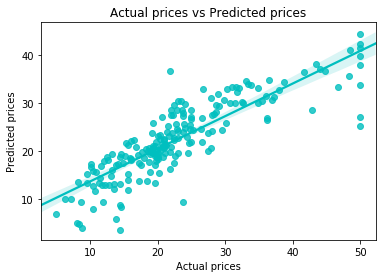

In [28]:
ax = sns.regplot(Y_test, test_int @ coeffs_qr1, color='c')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

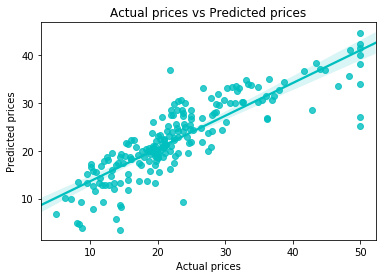

In [29]:
ax = sns.regplot(Y_test, test_int @ coeffs_qr2, color='c')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

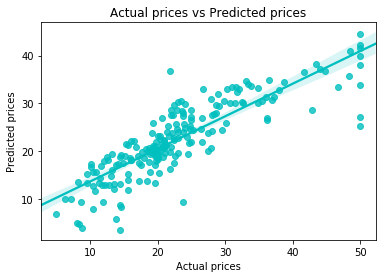

In [30]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.4, random_state=160)

lm = LinearRegression()
lm.fit(X_tr, Y_tr)

Y_pred = lm.predict(X_te)

ax = sns.regplot(Y_te, Y_pred, color='c')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()